In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plot
import datetime
from datetime import timedelta
from pandas_datareader import data as web
%matplotlib inline
dtformat='%Y-%m-%d %H:%M:%S'

In [2]:
used_df=pd.read_csv("used.csv")
sold_df=pd.read_csv("sold.csv")
used_df.head()

,product_id,time,used_ml
0,220,2018-01-23 00:52:26,59.9999
1,220,2018-01-23 00:52:25,162.4497
2,184,2018-01-23 02:31:33,42.5250
3,244,2018-01-23 02:57:29,47.9999
4,736,2018-01-23 02:21:05,4.3500


In [3]:
sold_df.head()

,product_id,time,sold_ml
0,184,2018-01-23 02:30:00,59.1470
1,184,2018-01-23 02:34:00,29.5735
2,244,2018-01-23 02:58:00,44.3603
3,736,2018-01-23 02:30:00,29.5735
4,736,2018-01-23 02:34:00,14.7867


# Creating a blank dataframe to insert matching product_id from both used and sold file

In [4]:
final=pd.DataFrame(columns=['product_id','used_ml_time','sold_ml_time','time_difference','usedml_vs_soldml'])

In [5]:
for i in range(len(used_df)):
    for j in range(len(sold_df)):
        if(used_df['product_id'].iloc[i]==sold_df['product_id'].iloc[j]):
            date1=datetime.datetime.strptime(used_df['time'].iloc[i], dtformat)
            date2=datetime.datetime.strptime(sold_df['time'].iloc[j], dtformat)
            diff=date1 - date2
            if(diff.days==0):
                if diff.seconds<=1200.00:
                    final=final.append({'product_id':used_df['product_id'].iloc[i],'used_ml_time':used_df['time'].iloc[i],'sold_ml_time':sold_df['time'].iloc[j],'time_difference':diff.seconds,'usedml_vs_soldml':abs(used_df['used_ml'].iloc[i]-sold_df['sold_ml'].iloc[j])},ignore_index=True)

In [6]:
final.shape

(276, 5)

# DataFrame containg both used and sold with matched product_id within time of 20 minutes

In [7]:
final.sort_values(by='product_id',inplace=True)
final.head(30)

,product_id,used_ml_time,sold_ml_time,time_difference,usedml_vs_soldml
137,24,2018-01-25 02:20:28,2018-01-25 02:18:00,148,0.8604
151,24,2018-01-25 03:12:15,2018-01-25 03:12:00,15,0.2794
153,24,2018-01-25 03:17:33,2018-01-25 03:14:00,213,5.8604
154,24,2018-01-25 03:31:09,2018-01-25 03:12:00,1149,26.7206
155,24,2018-01-25 03:31:09,2018-01-25 03:14:00,1029,17.6396
156,24,2018-01-25 03:31:09,2018-01-25 03:26:00,309,26.7206
157,24,2018-01-25 03:53:03,2018-01-25 03:45:00,483,14.6396
158,24,2018-01-25 03:53:03,2018-01-25 03:48:00,303,14.6396
159,24,2018-01-25 03:59:47,2018-01-25 03:45:00,887,9.6396
160,24,2018-01-25 03:59:47,2018-01-25 03:58:00,107,9.6396


# Picking closest used vs sold in time window

In [8]:
final.sort_values(by=['product_id','used_ml_time','time_difference'],inplace=True)
final.drop_duplicates(subset="used_ml_time",keep='first',inplace=True)
final.head(30)

,product_id,used_ml_time,sold_ml_time,time_difference,usedml_vs_soldml
137,24,2018-01-25 02:20:28,2018-01-25 02:18:00,148,0.8604
151,24,2018-01-25 03:12:15,2018-01-25 03:12:00,15,0.2794
153,24,2018-01-25 03:17:33,2018-01-25 03:14:00,213,5.8604
156,24,2018-01-25 03:31:09,2018-01-25 03:26:00,309,26.7206
158,24,2018-01-25 03:53:03,2018-01-25 03:48:00,303,14.6396
160,24,2018-01-25 03:59:47,2018-01-25 03:58:00,107,9.6396
51,41,2018-01-24 02:32:57,2018-01-24 02:32:00,57,0.0661
52,41,2018-01-24 02:50:56,2018-01-24 02:46:00,296,9.9339
70,41,2018-01-24 03:01:16,2018-01-24 03:01:00,16,8.1396
71,41,2018-01-24 03:06:21,2018-01-24 03:01:00,321,2.8604


In [9]:
final.sort_values(by=['product_id','sold_ml_time','time_difference'],inplace=True)
final.drop_duplicates(subset="sold_ml_time",keep='first',inplace=True)
final.head(30)

,product_id,used_ml_time,sold_ml_time,time_difference,usedml_vs_soldml
137,24,2018-01-25 02:20:28,2018-01-25 02:18:00,148,0.8604
151,24,2018-01-25 03:12:15,2018-01-25 03:12:00,15,0.2794
153,24,2018-01-25 03:17:33,2018-01-25 03:14:00,213,5.8604
156,24,2018-01-25 03:31:09,2018-01-25 03:26:00,309,26.7206
158,24,2018-01-25 03:53:03,2018-01-25 03:48:00,303,14.6396
160,24,2018-01-25 03:59:47,2018-01-25 03:58:00,107,9.6396
51,41,2018-01-24 02:32:57,2018-01-24 02:32:00,57,0.0661
52,41,2018-01-24 02:50:56,2018-01-24 02:46:00,296,9.9339
70,41,2018-01-24 03:01:16,2018-01-24 03:01:00,16,8.1396
72,41,2018-01-24 03:28:05,2018-01-24 03:28:00,5,15.9339


In [10]:
final.shape

(100, 5)

In [14]:
#final=final.pivot(index='sold_ml_time',columns='product_id',values='usedml_vs_soldml')
final.set_index('sold_ml_time')

,product_id,used_ml_time,time_difference,usedml_vs_soldml
sold_ml_time,,,,
2018-01-25 02:18:00,24,2018-01-25 02:20:28,148,0.8604
2018-01-25 03:12:00,24,2018-01-25 03:12:15,15,0.2794
2018-01-25 03:14:00,24,2018-01-25 03:17:33,213,5.8604
2018-01-25 03:26:00,24,2018-01-25 03:31:09,309,26.7206
2018-01-25 03:48:00,24,2018-01-25 03:53:03,303,14.6396
2018-01-25 03:58:00,24,2018-01-25 03:59:47,107,9.6396
2018-01-24 02:32:00,41,2018-01-24 02:32:57,57,0.0661
2018-01-24 02:46:00,41,2018-01-24 02:50:56,296,9.9339
2018-01-24 03:01:00,41,2018-01-24 03:01:16,16,8.1396


In [24]:
#final.plot(x='sold_ml_time',y='usedml_vs_soldml',figsize=(20,6),ax='product_id')

In [54]:
#final.groupby('product_id').plot(x='sold_ml_time',y='usedml_vs_soldml',figsize=(20,7),legend=True,kind='bar',subplots=True)

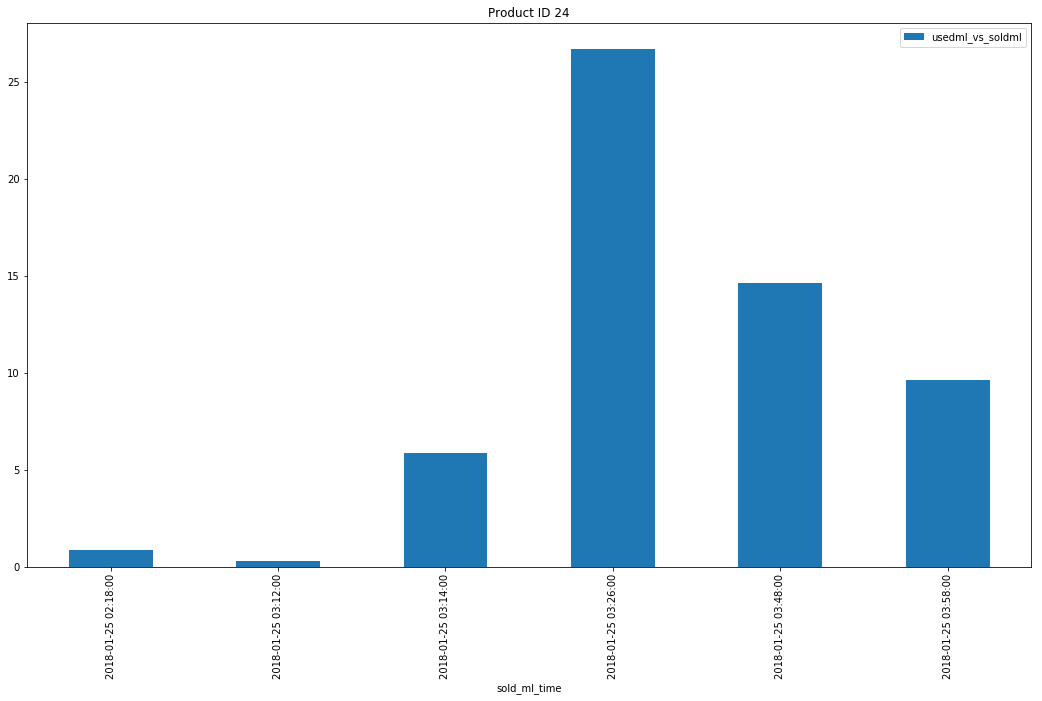

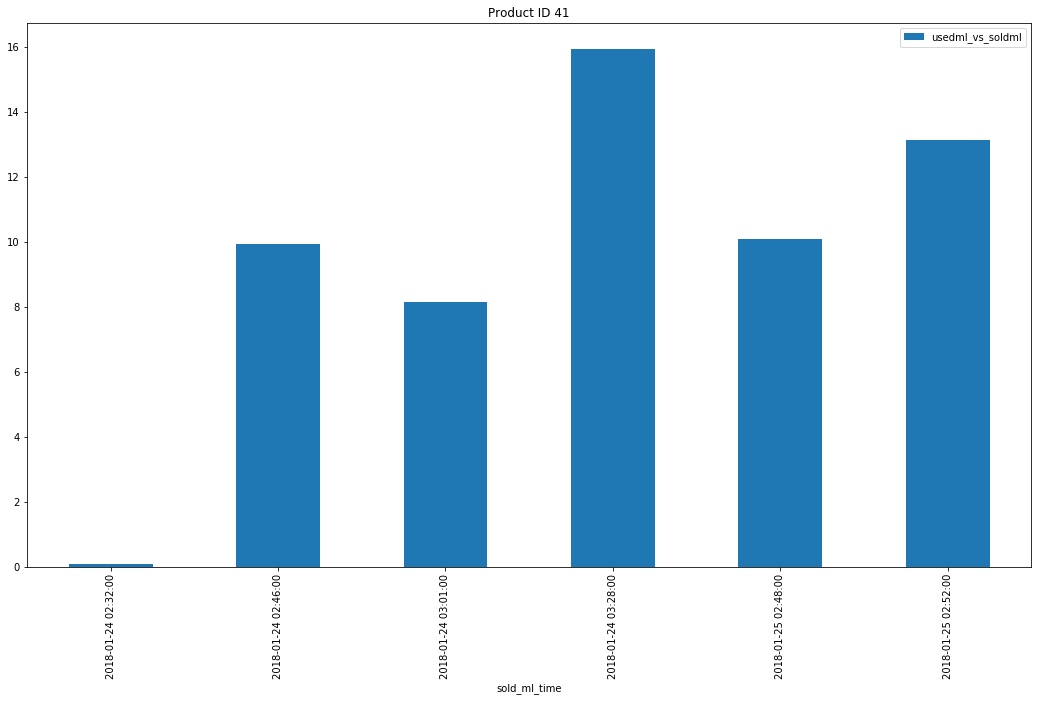

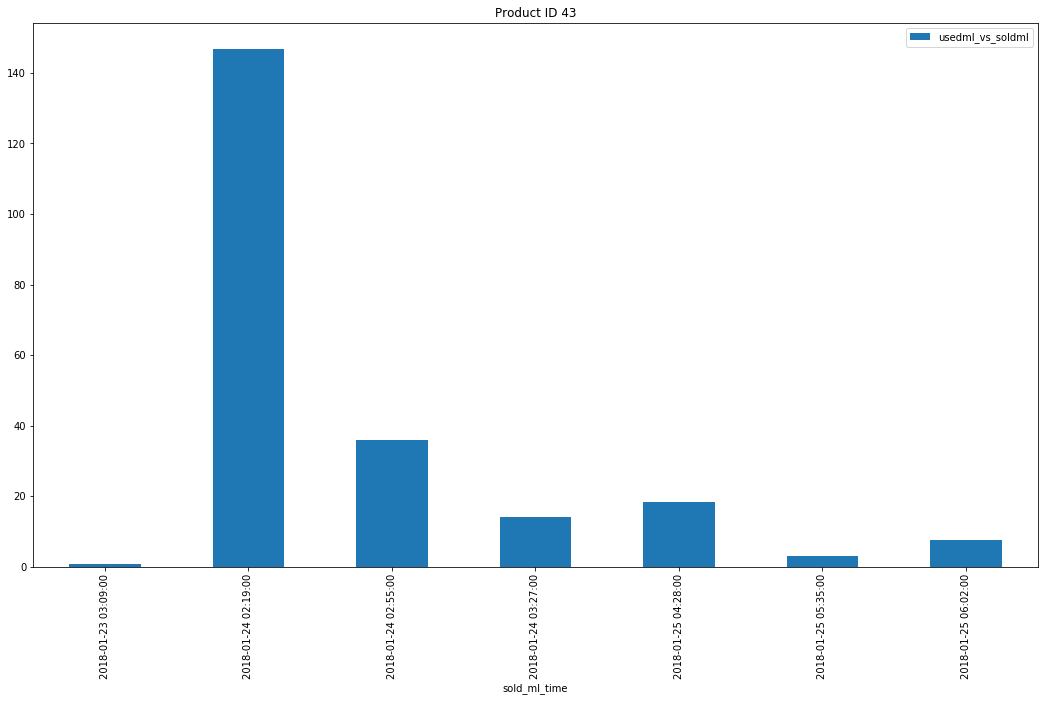

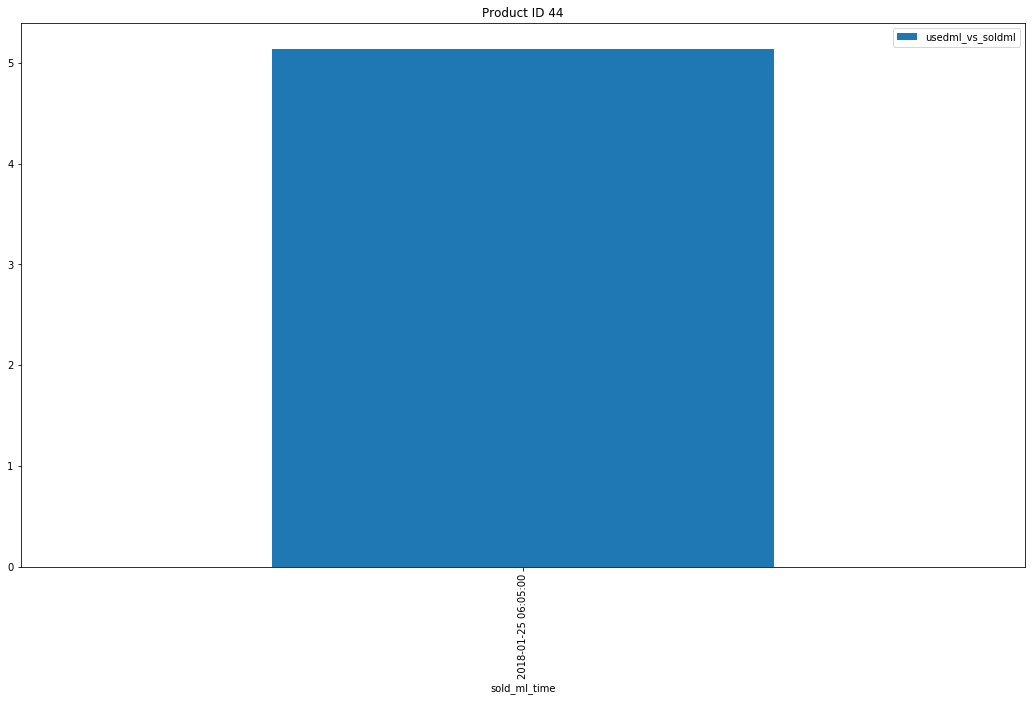

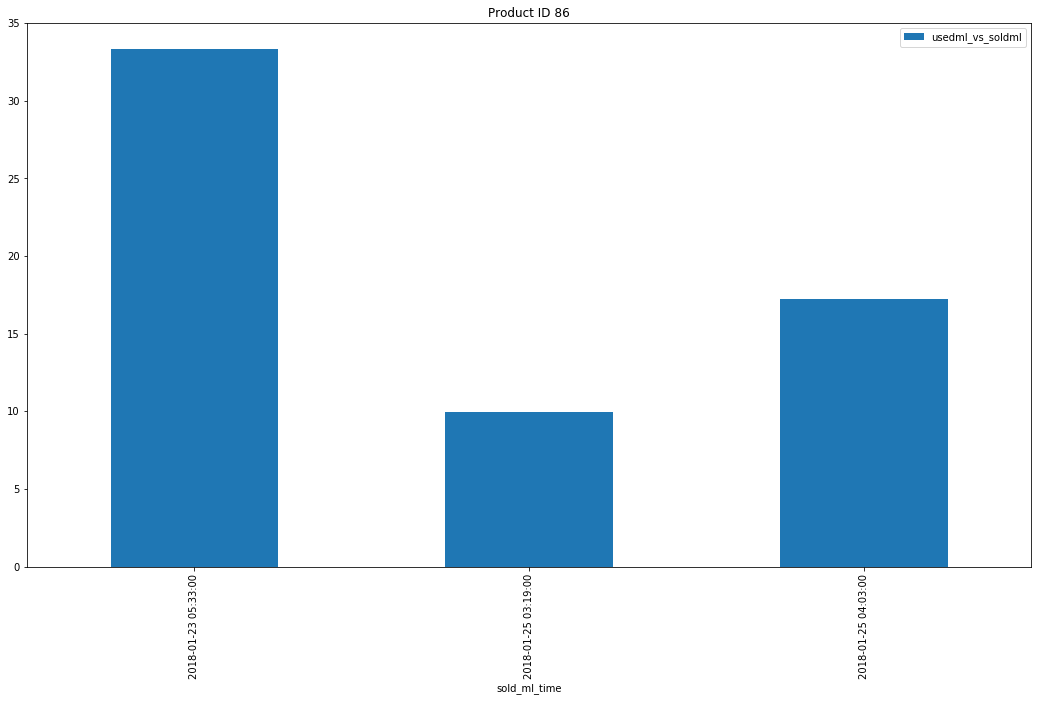

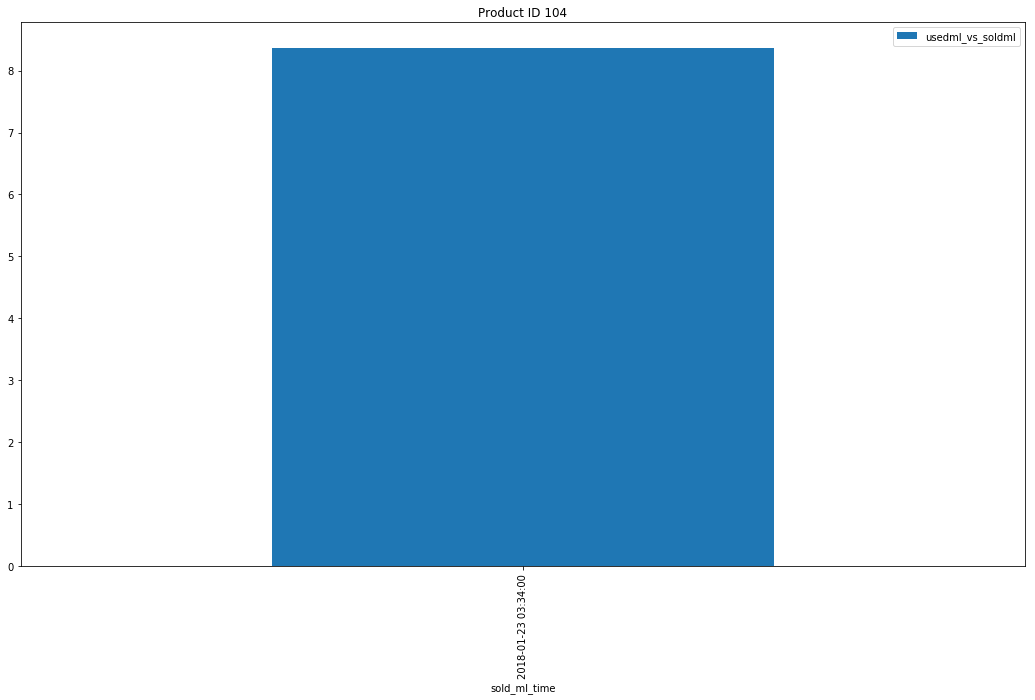

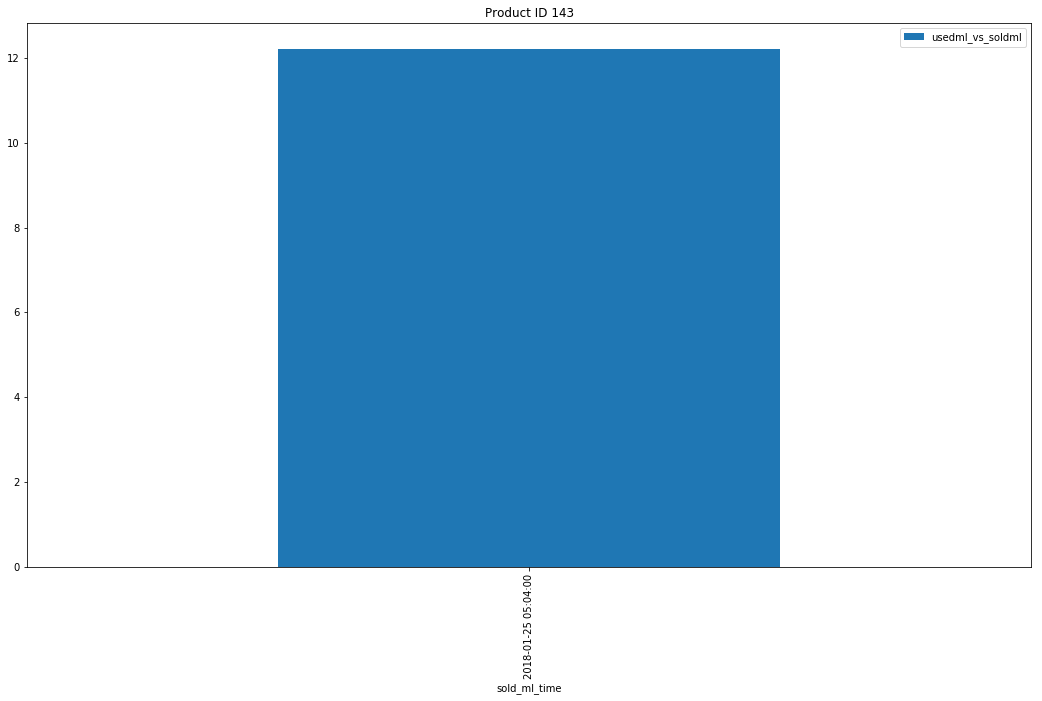

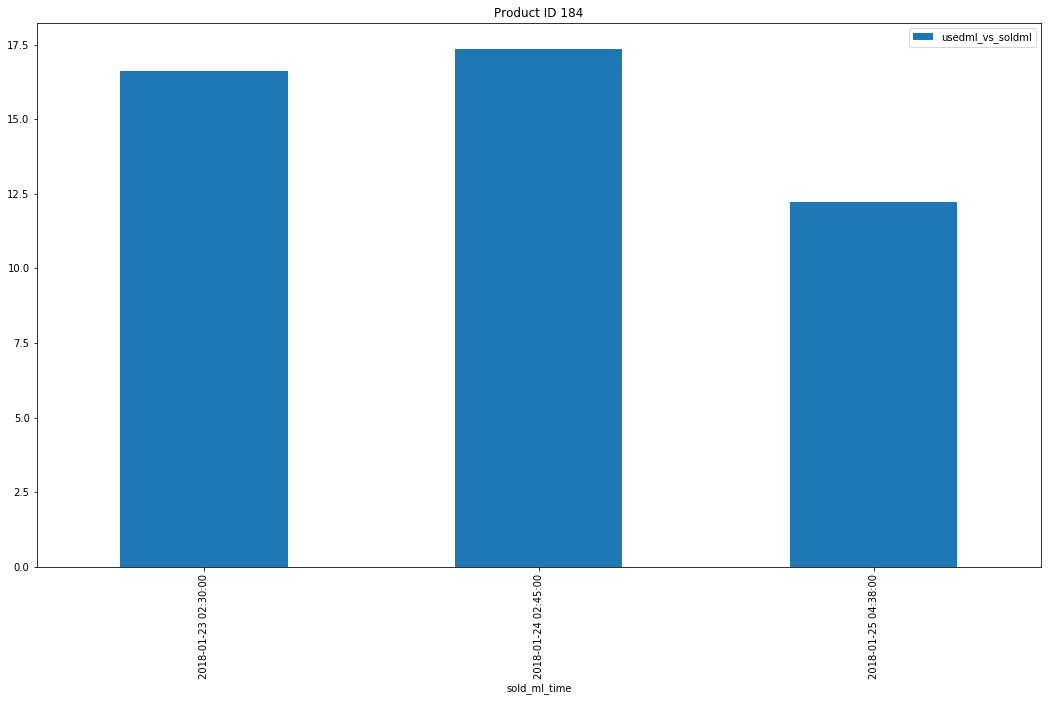

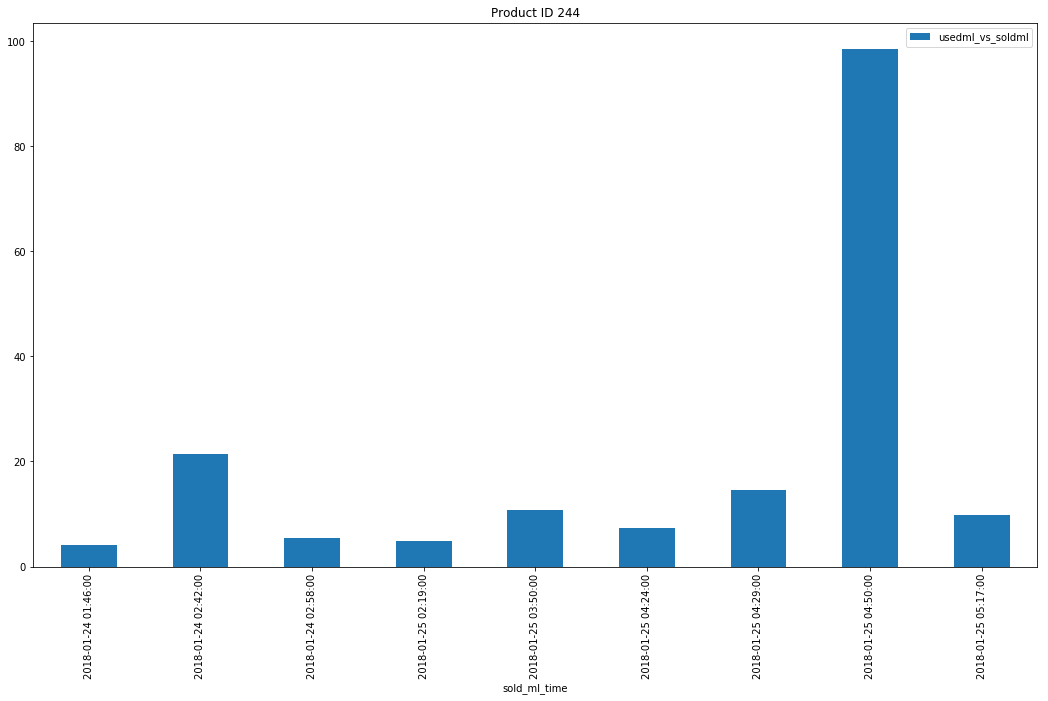

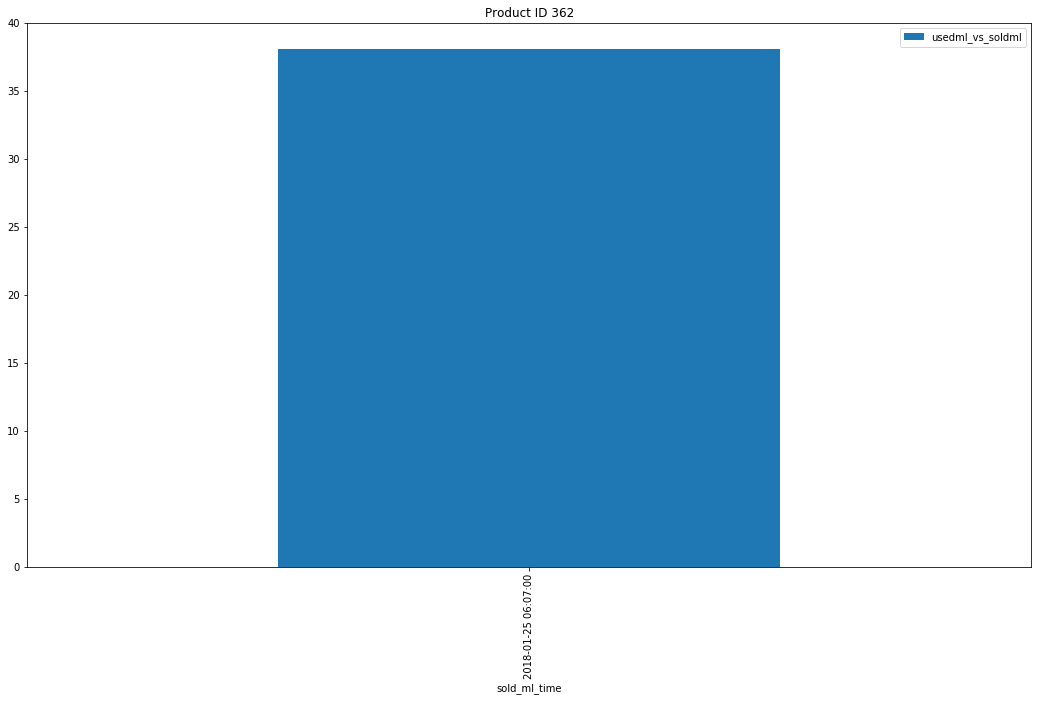

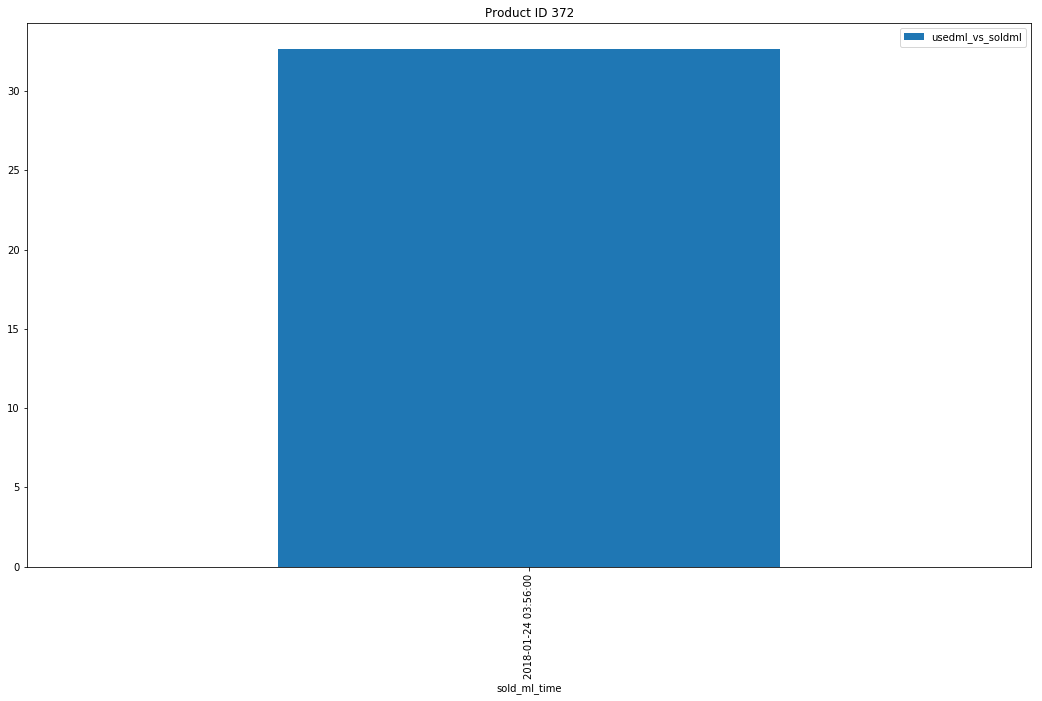

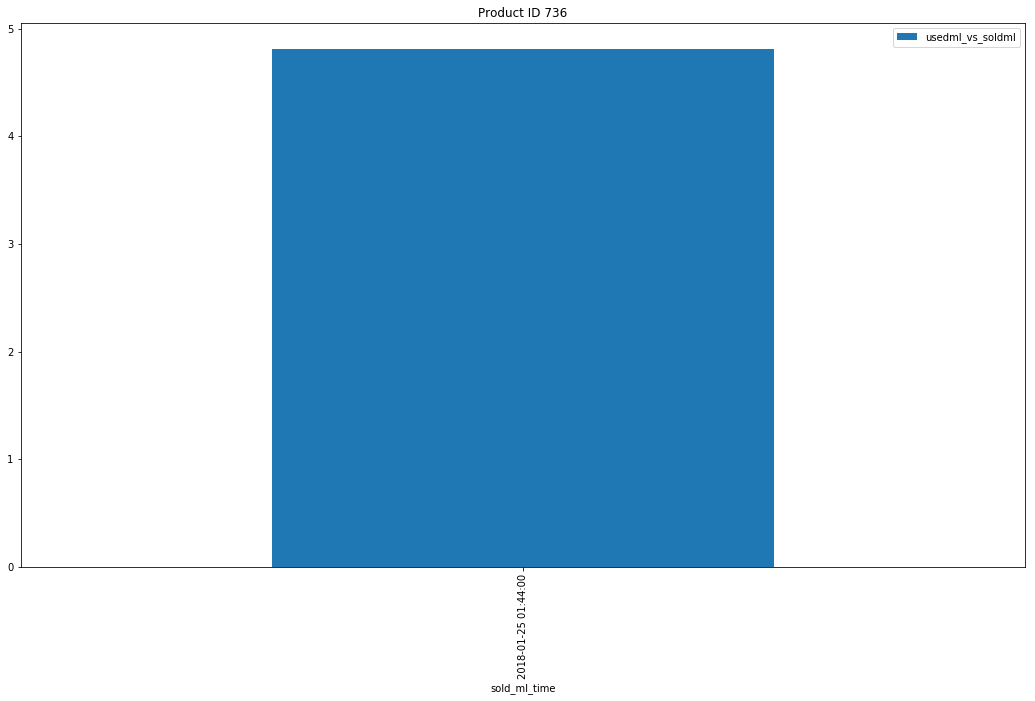

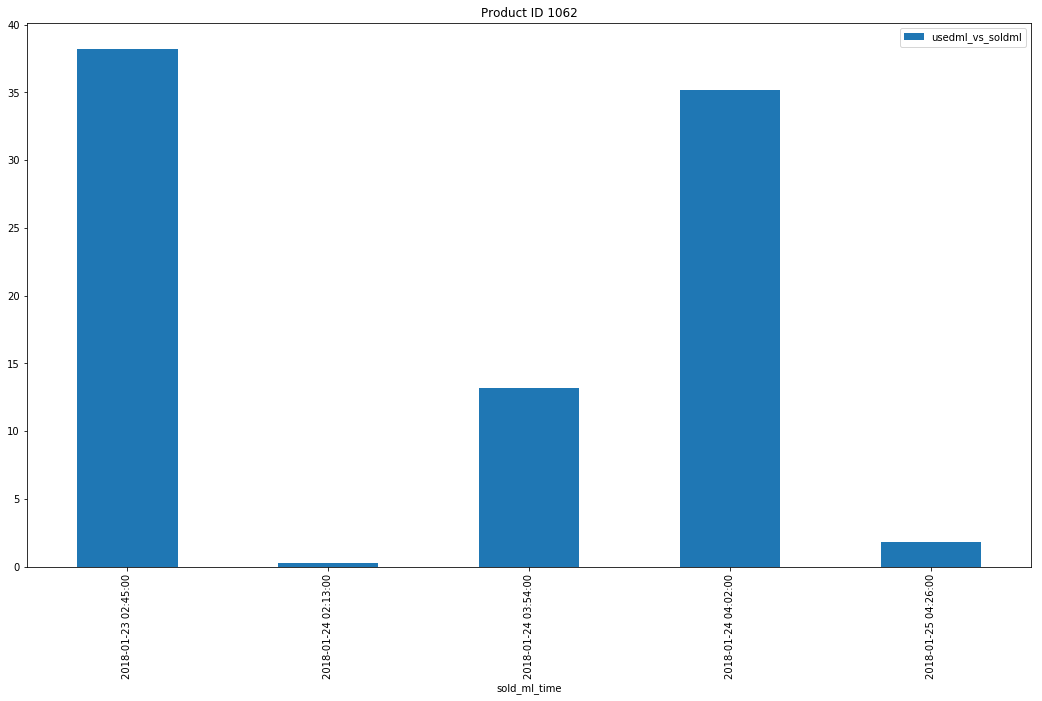

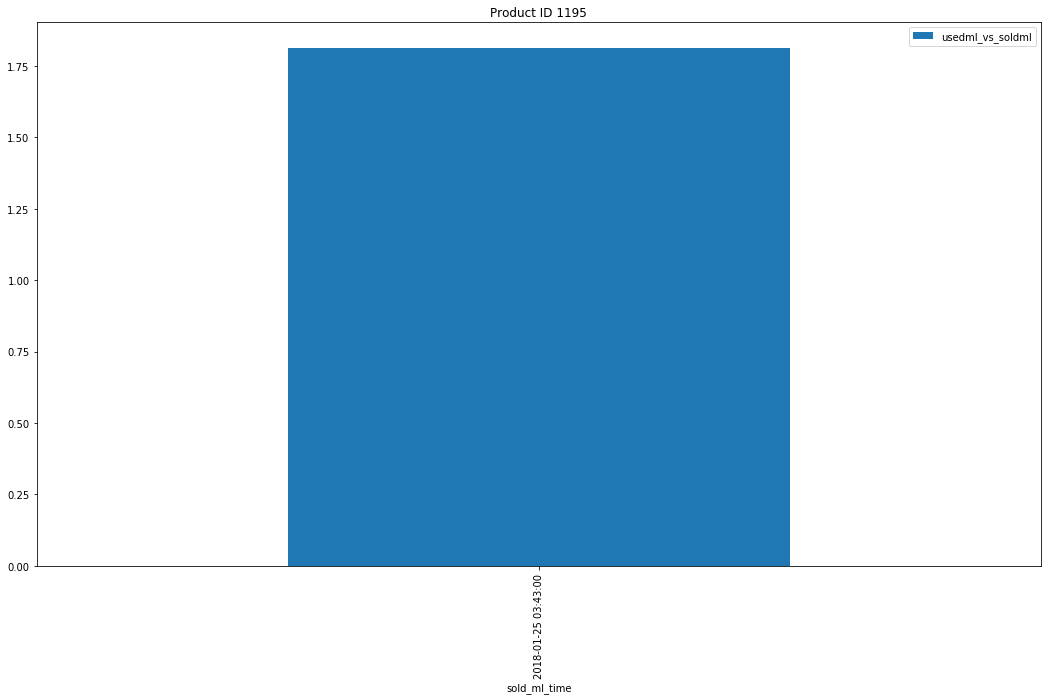

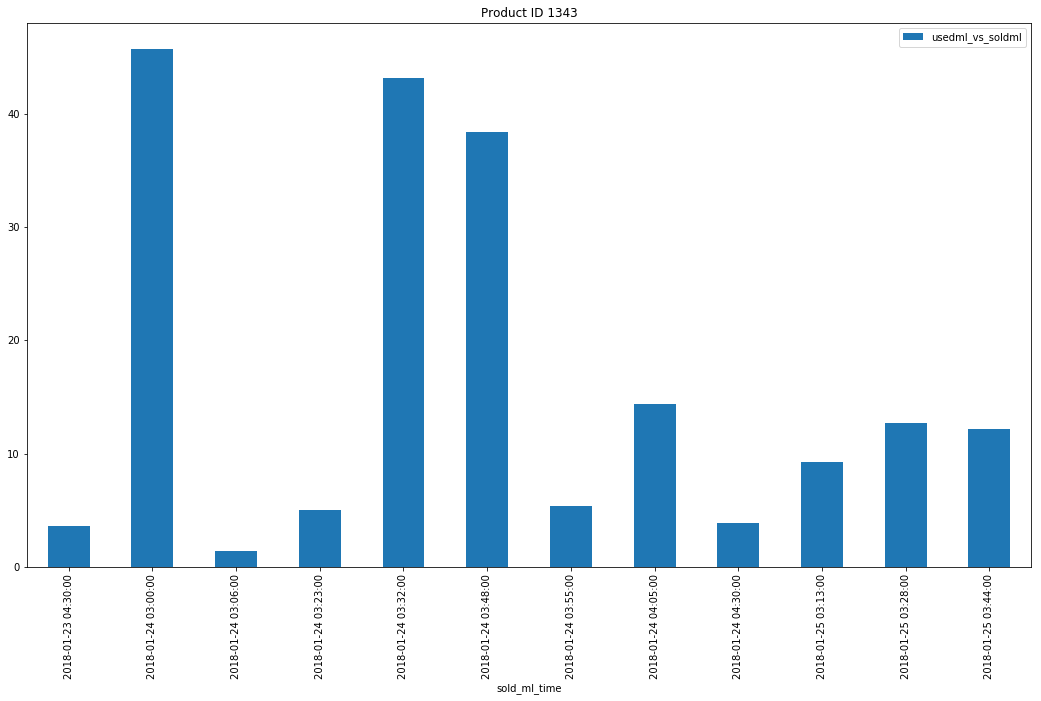

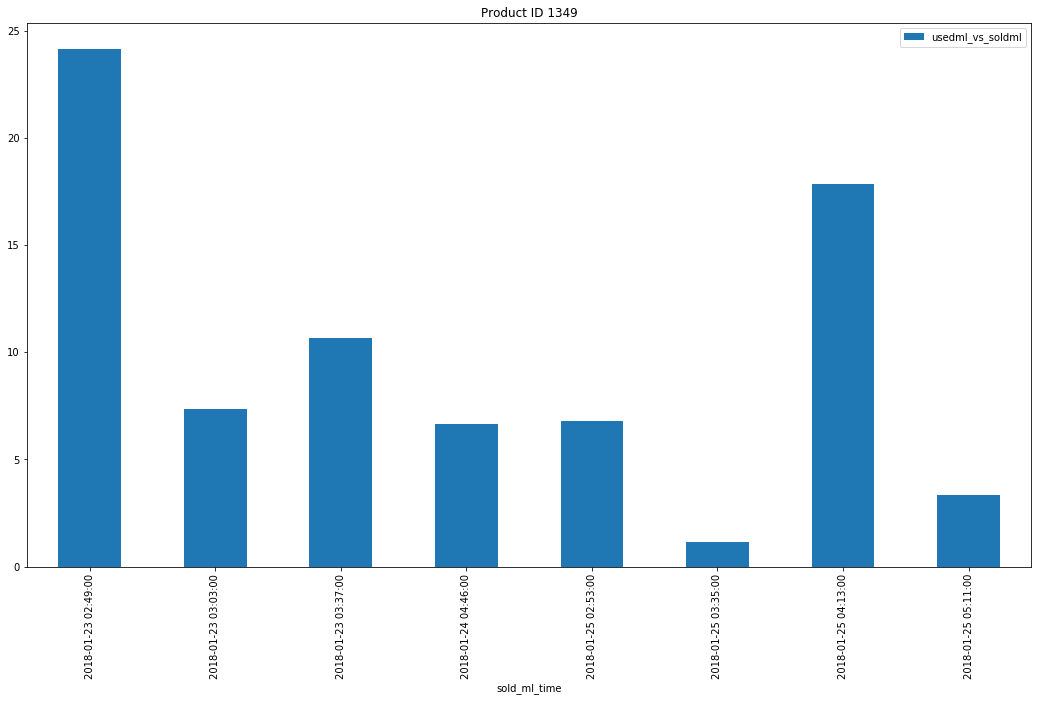

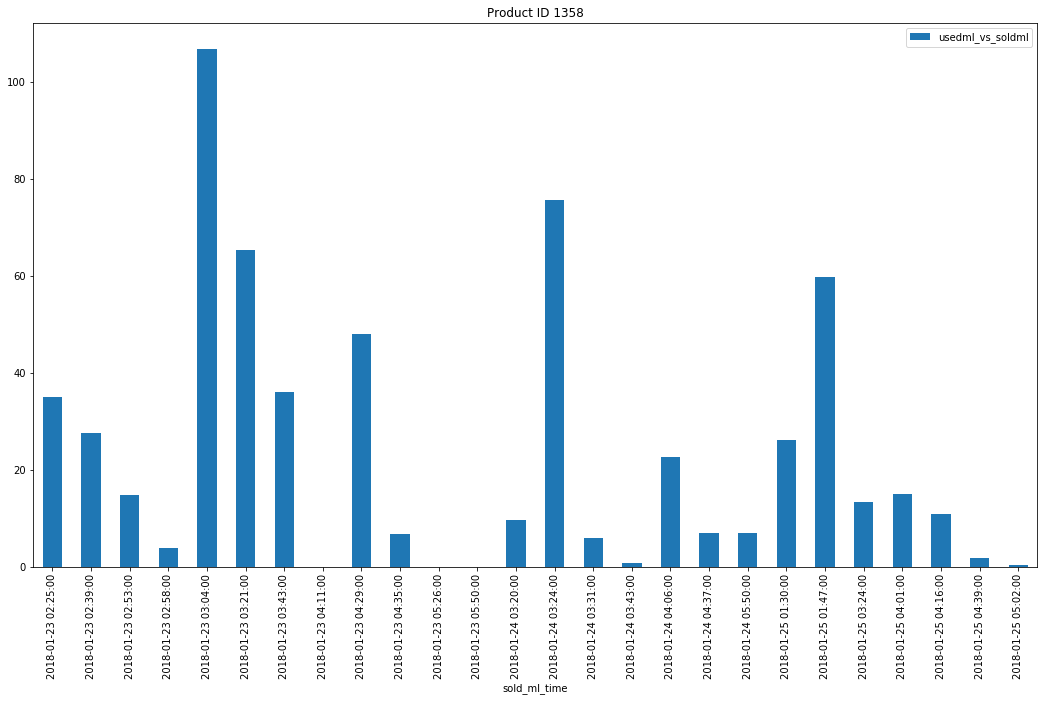

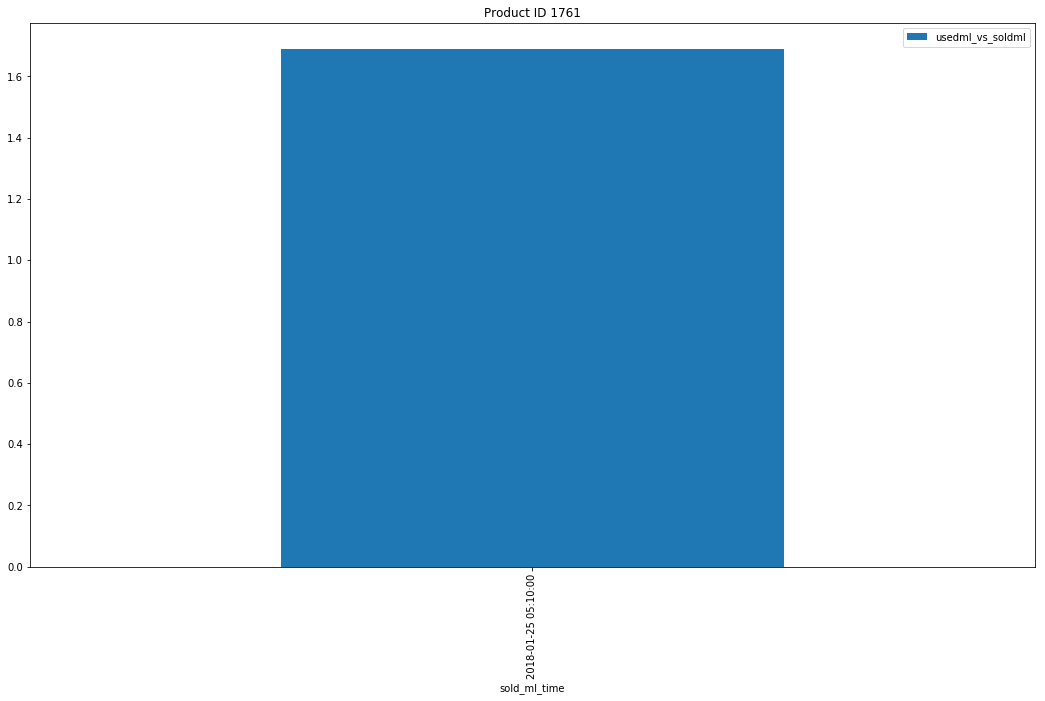

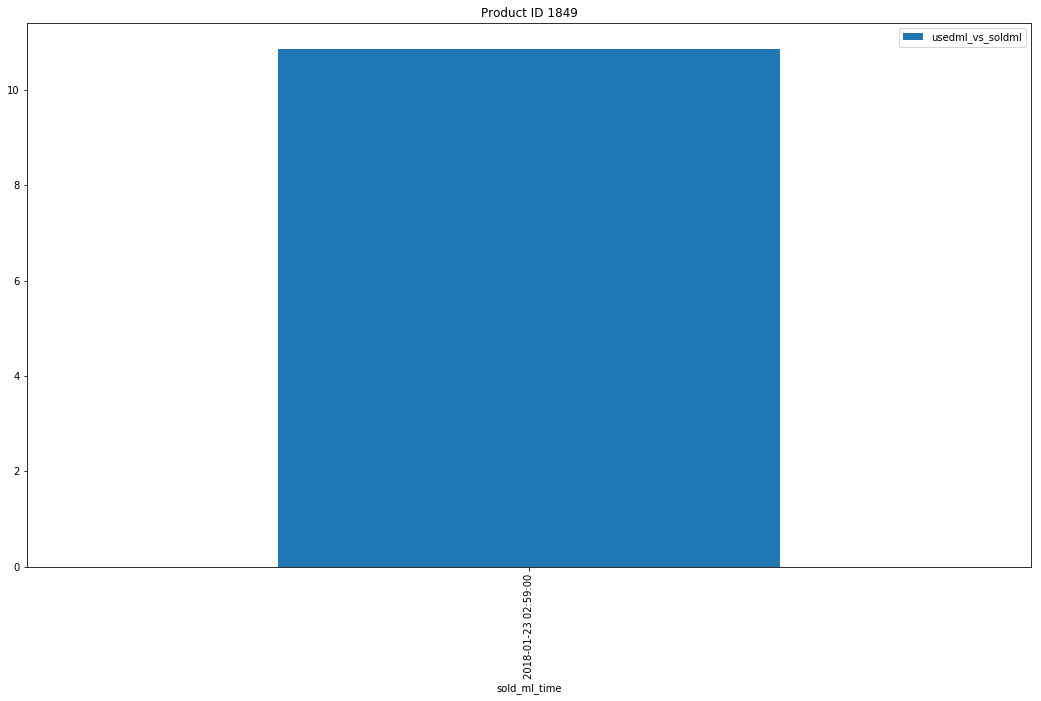

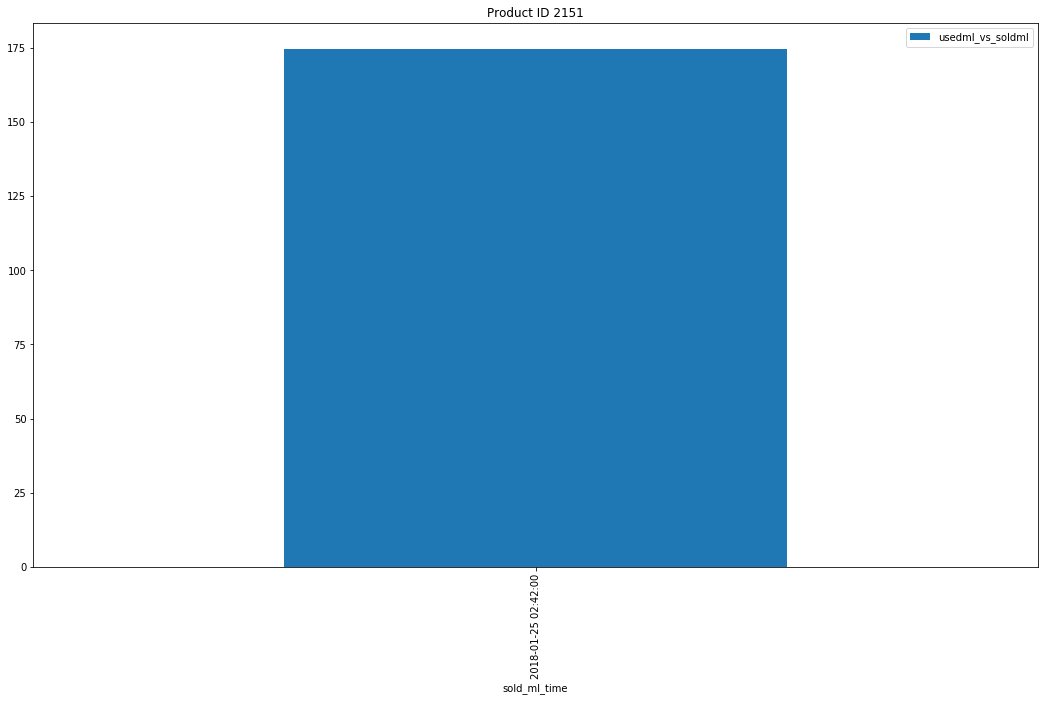

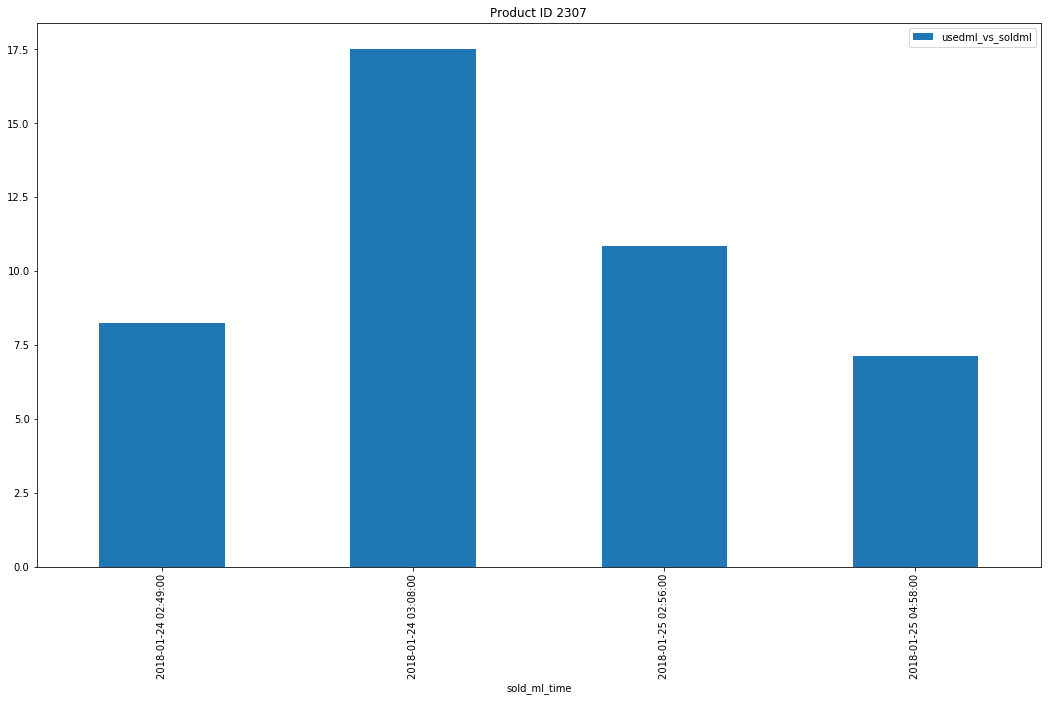

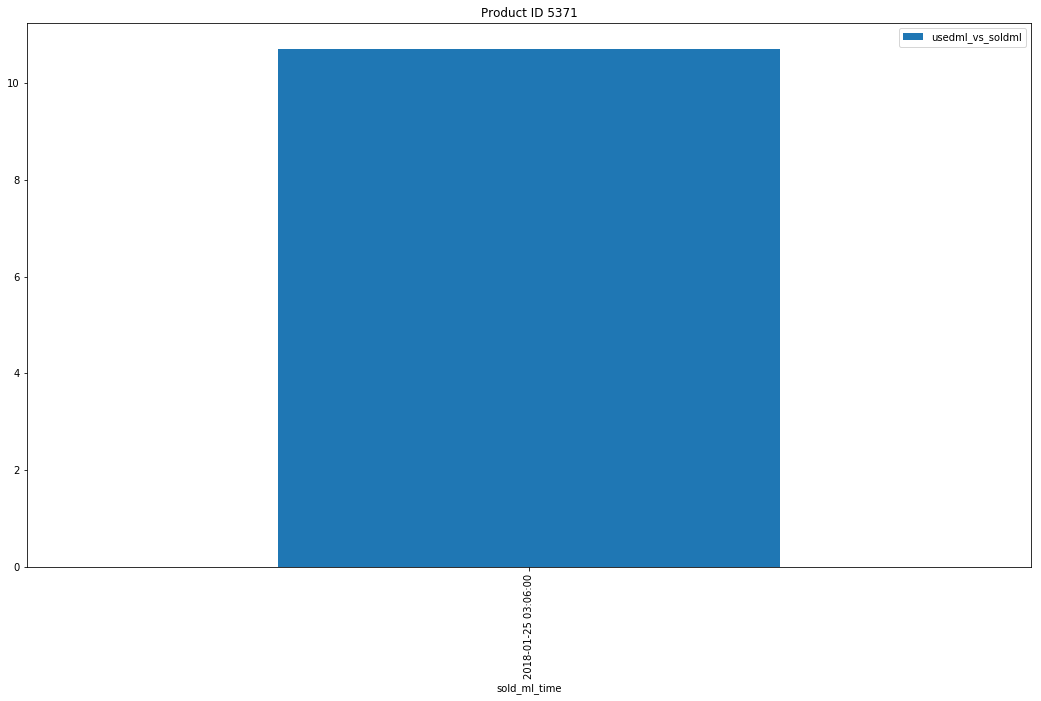

In [69]:
for title, group in final.groupby('product_id'):
    group.plot(x='sold_ml_time', y='usedml_vs_soldml', title='Product ID '+str(title),figsize=(18,10),kind='bar')